In [1]:
import pandas as pd

books = pd.read_csv("books_with_categories.csv")

In [3]:
from transformers import pipeline
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      top_k = None)
# has an evaluation accuracy of 66% which is significantly higher than the random-chance baseline of 14%
classifier("I love this!")


Device set to use cpu


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.008528691716492176},
  {'label': 'neutral', 'score': 0.005764589179307222},
  {'label': 'anger', 'score': 0.004419791977852583},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'disgust', 'score': 0.001611992483958602},
  {'label': 'fear', 'score': 0.0004138525982853025}]]

In [4]:
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548399925231934},
  {'label': 'neutral', 'score': 0.1698525995016098},
  {'label': 'sadness', 'score': 0.11640939861536026},
  {'label': 'surprise', 'score': 0.02070068009197712},
  {'label': 'disgust', 'score': 0.019100721925497055},
  {'label': 'joy', 'score': 0.015161462128162384},
  {'label': 'anger', 'score': 0.003935154061764479}]]

In [5]:
classifier(books['description'][0].split("."))

[[{'label': 'surprise', 'score': 0.7296021580696106},
  {'label': 'neutral', 'score': 0.14038598537445068},
  {'label': 'fear', 'score': 0.06816227734088898},
  {'label': 'joy', 'score': 0.04794260486960411},
  {'label': 'anger', 'score': 0.009156367741525173},
  {'label': 'disgust', 'score': 0.0026284768246114254},
  {'label': 'sadness', 'score': 0.002122163772583008}],
 [{'label': 'neutral', 'score': 0.4493706524372101},
  {'label': 'disgust', 'score': 0.27359113097190857},
  {'label': 'joy', 'score': 0.1090831384062767},
  {'label': 'sadness', 'score': 0.09362747520208359},
  {'label': 'anger', 'score': 0.04047833010554314},
  {'label': 'surprise', 'score': 0.02697019837796688},
  {'label': 'fear', 'score': 0.006879049818962812}],
 [{'label': 'neutral', 'score': 0.6462159156799316},
  {'label': 'sadness', 'score': 0.242733433842659},
  {'label': 'disgust', 'score': 0.043422672897577286},
  {'label': 'surprise', 'score': 0.02830057218670845},
  {'label': 'joy', 'score': 0.01421149075

In [6]:
sentences = books["description"][0].split(".")
predictions = classifier(sentences)

In [7]:
sentences[0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives'

In [8]:
predictions[0]

[{'label': 'surprise', 'score': 0.7296021580696106},
 {'label': 'neutral', 'score': 0.14038598537445068},
 {'label': 'fear', 'score': 0.06816227734088898},
 {'label': 'joy', 'score': 0.04794260486960411},
 {'label': 'anger', 'score': 0.009156367741525173},
 {'label': 'disgust', 'score': 0.0026284768246114254},
 {'label': 'sadness', 'score': 0.002122163772583008}]

In [9]:
sentences[3]

' Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist'

In [10]:
predictions[3]

[{'label': 'fear', 'score': 0.9281682968139648},
 {'label': 'anger', 'score': 0.03219081461429596},
 {'label': 'neutral', 'score': 0.012808660045266151},
 {'label': 'sadness', 'score': 0.008756875991821289},
 {'label': 'surprise', 'score': 0.008597892709076405},
 {'label': 'disgust', 'score': 0.008431807160377502},
 {'label': 'joy', 'score': 0.0010455832816660404}]

In [11]:
sorted(predictions[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156367741525173},
 {'label': 'disgust', 'score': 0.0026284768246114254},
 {'label': 'fear', 'score': 0.06816227734088898},
 {'label': 'joy', 'score': 0.04794260486960411},
 {'label': 'neutral', 'score': 0.14038598537445068},
 {'label': 'sadness', 'score': 0.002122163772583008},
 {'label': 'surprise', 'score': 0.7296021580696106}]

In [12]:
import numpy as np

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}
    for prediction in predictions:
        sorted_predictions = sorted(prediction, key=lambda x: x['label'])
        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])
    
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

In [14]:
for i in range(10):
    isbn.append(books['isbn13'][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

In [15]:
emotion_scores

{'anger': [np.float64(0.06413363665342331),
  np.float64(0.6126194596290588),
  np.float64(0.06413363665342331),
  np.float64(0.35148516297340393),
  np.float64(0.0814124271273613),
  np.float64(0.23222433030605316),
  np.float64(0.5381842255592346),
  np.float64(0.06413363665342331),
  np.float64(0.3006698489189148),
  np.float64(0.06413363665342331)],
 'disgust': [np.float64(0.27359113097190857),
  np.float64(0.3482842445373535),
  np.float64(0.10400673747062683),
  np.float64(0.1507222205400467),
  np.float64(0.18449550867080688),
  np.float64(0.7271752953529358),
  np.float64(0.15585486590862274),
  np.float64(0.10400673747062683),
  np.float64(0.27948102355003357),
  np.float64(0.1779264211654663)],
 'fear': [np.float64(0.9281682968139648),
  np.float64(0.942527711391449),
  np.float64(0.9723207950592041),
  np.float64(0.36070549488067627),
  np.float64(0.09504342079162598),
  np.float64(0.051362838596105576),
  np.float64(0.7474275231361389),
  np.float64(0.4044971764087677),
  n

In [18]:
from tqdm import tqdm

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
    isbn.append(books['isbn13'][i])
    sentences = books["description"][i].split(".")
    predictions = classifier(sentences)
    max_scores = calculate_max_emotion_scores(predictions)
    for label in emotion_labels:
        emotion_scores[label].append(max_scores[label])

100%|██████████| 5197/5197 [18:54<00:00,  4.58it/s]  


In [19]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [20]:
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273591,0.928168,0.932798,0.646216,0.967158,0.729602,9780002005883
1,0.612619,0.348284,0.942528,0.704422,0.887940,0.111690,0.252546,9780002261982
2,0.064134,0.104007,0.972321,0.767239,0.549477,0.111690,0.078765,9780006178736
3,0.351485,0.150722,0.360705,0.251882,0.732685,0.111690,0.078765,9780006280897
4,0.081412,0.184496,0.095043,0.040564,0.884390,0.475880,0.078765,9780006280934
...,...,...,...,...,...,...,...,...
5192,0.148209,0.030643,0.919165,0.255171,0.853721,0.980877,0.030656,9788172235222
5193,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765,9788173031014
5194,0.009997,0.009929,0.339218,0.947779,0.375754,0.066685,0.057625,9788179921623
5195,0.064134,0.104007,0.459270,0.759457,0.951104,0.368111,0.078765,9788185300535


In [21]:
books = pd.merge(books, emotions_df, on="isbn13")

In [22]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,tagged_description,simple_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273591,0.928168,0.932798,0.646216,0.967158,0.729602
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348284,0.942528,0.704422,0.887940,0.111690,0.252546
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767239,0.549477,0.111690,0.078765
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351485,0.150722,0.360705,0.251882,0.732685,0.111690,0.078765
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184496,0.095043,0.040564,0.884390,0.475880,0.078765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148209,0.030643,0.919165,0.255171,0.853721,0.980877,0.030656
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339218,0.947779,0.375754,0.066685,0.057625
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,...,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459270,0.759457,0.951104,0.368111,0.078765


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

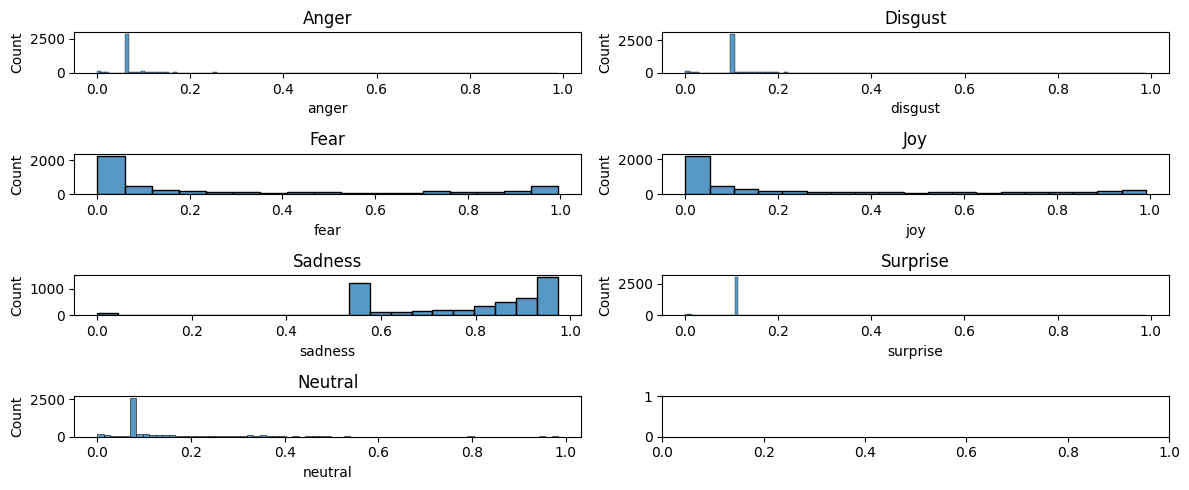

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(12, 5))

sns.histplot(books["anger"], ax=axes[0, 0])
axes[0, 0].set_title("Anger")

sns.histplot(books["disgust"], ax=axes[0, 1])
axes[0, 1].set_title("Disgust")

sns.histplot(books["fear"], ax=axes[1, 0])
axes[1, 0].set_title("Fear")

sns.histplot(books["joy"], ax=axes[1, 1])
axes[1, 1].set_title("Joy")

sns.histplot(books["sadness"], ax=axes[2, 0])
axes[2, 0].set_title("Sadness")

sns.histplot(books["surprise"], ax=axes[2, 1])
axes[2, 1].set_title("Surprise")

sns.histplot(books["neutral"], ax=axes[3, 0])
axes[3, 0].set_title("Neutral")

plt.tight_layout()
plt.show()


In [26]:
books.to_csv("books_with_emotions.csv", index = False)